In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load in the param file
P = pd.read_csv('param_file_new.csv')
P.head()

,prefix,test_num,upper_numlayers,middle_numlayers,lower_numlayers,crust_thickness,athy_multiplier,athy_exp,min_x,max_x,...,TMCH,OVERF,IRDOF,ISLORD,IBACK,ICOUPL,RNMAX,lagrit_exec,surf_filename,boundary_filename
0,test1,1,20,10,20,1000,0.5136,-0.3713,1000,11000,...,-0.00001,1.1,0,0,0,0,3600,/home/rperrin/Programs/LaGriT/src/lagrit,/home/rperrin/Documents/IODP_porosity_analysis...,/home/rperrin/Documents/IODP_porosity_analysis...
1,test2,2,20,10,20,1000,0.6136,-0.3713,1000,11000,...,-0.00001,1.1,0,0,0,0,3600,/home/rperrin/Programs/LaGriT/src/lagrit,/home/rperrin/Documents/IODP_porosity_analysis...,/home/rperrin/Documents/IODP_porosity_analysis...
2,test3,3,20,10,20,1000,0.7136,-0.3713,1000,11000,...,-0.00001,1.1,0,0,0,0,3600,/home/rperrin/Programs/LaGriT/src/lagrit,/home/rperrin/Documents/IODP_porosity_analysis...,/home/rperrin/Documents/IODP_porosity_analysis...
3,test4,4,20,10,20,1000,0.8136,-0.3713,1000,11000,...,-0.00001,1.1,0,0,0,0,3600,/home/rperrin/Programs/LaGriT/src/lagrit,/home/rperrin/Documents/IODP_porosity_analysis...,/home/rperrin/Documents/IODP_porosity_analysis...
4,test5,5,20,10,20,1000,0.9136,-0.3713,1000,11000,...,-0.00001,1.1,0,0,0,0,3600,/home/rperrin/Programs/LaGriT/src/lagrit,/home/rperrin/Documents/IODP_porosity_analysis...,/home/rperrin/Documents/IODP_porosity_analysis...


In [33]:
# create vectors
xvec = np.arange(P.min_x[0],P.max_x[0],P.dx[0])
yvec = np.arange(P.min_y[0],P.max_y[0],P.dy[0])

bob= P.upper_numlayers[0]+P.middle_numlayers[0]+P.lower_numlayers[0]
print(bob)

zvec = np.arange(0,P.upper_numlayers[0]+P.middle_numlayers[0]+P.lower_numlayers[0],1)

XX,YY,ZZ = np.meshgrid(xvec,yvec,zvec)

50


In [34]:
# load a test file
filename = '%s/%s.36500000.0_days_sca_node.csv' % (P.prefix[0],P.prefix[0])
D = pd.read_csv(filename)
D.tail()

,node,X coordinate (m),Y coordinate (m),Z coordinate (m),Liquid Pressure (MPa),Temperature (deg C),Saturation,X Permeability (log m**2),Y Permeability (log m**2),Z Permeability (log m**2)
4995,4996,10000.0,6000.0,5000.0,2.843881,1.0,1.0,-18.0,-18.0,-18.0
4996,4997,10000.0,7000.0,5000.0,2.838621,1.0,1.0,-18.0,-18.0,-18.0
4997,4998,10000.0,8000.0,5000.0,2.835714,1.0,1.0,-18.0,-18.0,-18.0
4998,4999,10000.0,9000.0,5000.0,2.837546,1.0,1.0,-18.0,-18.0,-18.0
4999,5000,10000.0,10000.0,5000.0,2.836617,1.0,1.0,-18.0,-18.0,-18.0


In [37]:
D['ZZtemp'] = ZZ.flatten(order='F')
D.tail()

,node,X coordinate (m),Y coordinate (m),Z coordinate (m),Liquid Pressure (MPa),Temperature (deg C),Saturation,X Permeability (log m**2),Y Permeability (log m**2),Z Permeability (log m**2),ZZtemp
4995,4996,10000.0,6000.0,5000.0,2.843881,1.0,1.0,-18.0,-18.0,-18.0,49
4996,4997,10000.0,7000.0,5000.0,2.838621,1.0,1.0,-18.0,-18.0,-18.0,49
4997,4998,10000.0,8000.0,5000.0,2.835714,1.0,1.0,-18.0,-18.0,-18.0,49
4998,4999,10000.0,9000.0,5000.0,2.837546,1.0,1.0,-18.0,-18.0,-18.0,49
4999,5000,10000.0,10000.0,5000.0,2.836617,1.0,1.0,-18.0,-18.0,-18.0,49


/tmp/ipykernel_119431/2644469841.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  D_temp = D_temp[D[' X coordinate (m)']==6000]


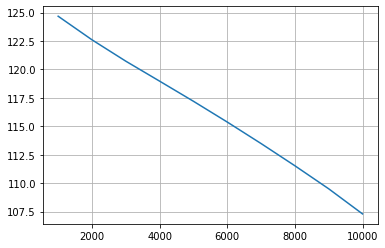

In [47]:
# take a subset
D_temp = D[D.ZZtemp==12]
D_temp = D_temp[D[' X coordinate (m)']==6000]

plt.plot(D_temp[' Y coordinate (m)'],D_temp[' Temperature (deg C)'])
plt.grid()
plt.show()